<a href="https://colab.research.google.com/github/Nazlaabay/Nazlaabay/blob/main/Submission%20B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =============================================================================
# PROBLEM B1
#
# Given two arrays, train a neural network model to match the X to the Y.
# Predict the model with new values of X [-2.0, 10.0]
# We provide the model prediction, do not change the code.
#
# The test infrastructure expects a trained model that accepts
# an input shape of [1]
# Do not use lambda layers in your model.
#
# Please be aware that this is a linear model.
# We will test your model with values in a range as defined in the array to make sure your model is linear.
#
# Desired loss (MSE) < 1e-3
# =============================================================================

import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

def solution_B1():
    # DO NOT CHANGE THIS CODE
    X = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], dtype=float)
    Y = np.array([5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0], dtype=float)

    # YOUR CODE HERE
    normalizer = tf.keras.layers.Normalization(axis=None, input_shape=(1,))
    normalizer.adapt(X)

    model = keras.Sequential()
    model.add(normalizer)
    model.add(keras.layers.Dense(32))
    model.add(keras.layers.Dense(1))

    model.compile(loss='mse', optimizer='adam')
    model.fit(X, Y, epochs=1000, callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=10)])

    print(model.predict([-2.0, 10.0]))

    return model

# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_B1()
    model.save("model_B1.h5")

Epoch 1/1000
1/1 [==============================] - 1s 648ms/step - loss: 137.8954
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 137.6262
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 137.3582
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 137.0914
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 136.8258
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 136.5614
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 136.2982
Epoch 8/1000
1/1 [==============================] - 0s 15ms/step - loss: 136.0359
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 135.7747
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 135.5143
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 135.2547
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 134.9958
Epoch 13/1000
1/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
# =============================================================================
# PROBLEM B2
#
# Build a classifier for the Fashion MNIST dataset.
# The test will expect it to classify 10 classes.
# The input shape should be 28x28 monochrome. Do not resize the data.
# Your input layer should accept (28, 28) as the input shape.
#
# Don't use lambda layers in your model.
#
# Desired accuracy AND validation_accuracy > 83%
# =============================================================================

import tensorflow as tf
import urllib.request
import numpy as np

def solution_B2():
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # NORMALIZE YOUR IMAGE HERE
    (training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
    training_images=training_images.reshape(60000, 28, 28, 1)
    training_images=training_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    test_images=test_images/255.0

    # DEFINE YOUR MODEL HERE
    # End with 10 Neuron Dense, activated by softmax
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    # COMPILE MODEL HERE
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    # TRAIN YOUR MODEL HERE
    model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=10, verbose=1)

    return model

# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_B2()
    model.save("model_B2.h5")

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4439 - accuracy: 0.8382 - val_loss: 0.3540 - val_accuracy: 0.8722
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2979 - accuracy: 0.8921 - val_loss: 0.2934 - val_accuracy: 0.8947
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2523 - accuracy: 0.9071 - val_loss: 0.2869 - val_accuracy: 0.8947
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2215 - accuracy: 0.9186 - val_loss: 0.2877 - val_accuracy: 0.8911
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1944 - accuracy: 0.9280 - val_loss: 0.2720 - val_accuracy: 0.9006
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1727 - accuracy: 0.9351 - val_loss: 0.2527 - val_accuracy: 0.9080
Epoch 7/10
1875/1875 [==============================] - 59s 3

In [5]:
pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.1 MB/s eta 0:00:00


In [6]:
# ========================================================================================
# PROBLEM B3
#
# Build a CNN based classifier for Rock-Paper-Scissors dataset.
# Your input layer should accept 150x150 with 3 bytes color as the input shape.
# This is unlabeled data, use ImageDataGenerator to automatically label it.
# Don't use lambda layers in your model.
#
# The dataset used in this problem is created by Laurence Moroney (laurencemoroney.com).
#
# Desired accuracy AND validation_accuracy > 83%
# ========================================================================================

import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def solution_B3():
    data_url = 'https://github.com/dicodingacademy/assets/releases/download/release-rps/rps.zip'
    urllib.request.urlretrieve(data_url, 'rps.zip')
    local_file = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/')
    zip_ref.close()

    TRAINING_DIR = "data/rps/"
    VAL_DIR = "data/rps/"

    train_datagen = ImageDataGenerator(
        rescale=1/255,
        rotation_range=40,
        horizontal_flip=True,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest'
    )

    train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        class_mode='categorical',
        batch_size=64,
        target_size=(150, 150))

    test_datagen = ImageDataGenerator(rescale=1./255)

    validation_generator = test_datagen.flow_from_directory(VAL_DIR,
                                                            class_mode='categorical',
                                                            batch_size=32,
                                                            target_size=(150, 150))

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.83 and logs.get('val_accuracy') > 0.83):
                print("\n Accuracy lebih fari 83%, berhenti")
                self.model.stop_training = True

    customCallback = myCallback()

    model = tf.keras.models.Sequential([
        # YOUR CODE HERE, end with 3 Neuron Dense, activated by softmax
        Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=RMSprop(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    model.fit(train_generator, epochs=10, verbose=1,
              validation_data=validation_generator, callbacks=[customCallback])

    return model

# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    model = solution_B3()
    model.save("model_B3.h5")

Found 2520 images belonging to 3 classes.
Found 2520 images belonging to 3 classes.
Epoch 1/10
40/40 [==============================] - 104s 3s/step - loss: 1.0358 - accuracy: 0.4877 - val_loss: 0.6921 - val_accuracy: 0.8016
Epoch 2/10
40/40 [==============================] - 100s 3s/step - loss: 0.6257 - accuracy: 0.7425 - val_loss: 0.2234 - val_accuracy: 0.9333
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 0.4056 - accuracy: 0.8508
 Accuracy lebih fari 83%, berhenti
40/40 [==============================] - 118s 3s/step - loss: 0.4056 - accuracy: 0.8508 - val_loss: 0.1800 - val_accuracy: 0.9464


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
# ===================================================================================================
# PROBLEM B4
#
# Build and train a classifier for the BBC-text dataset.
# This is a multiclass classification problem.
# Do not use lambda layers in your model.
#
# The dataset used in this problem is originally published in: http://mlg.ucd.ie/datasets/bbc.html.
# Desired accuracy and validation_accuracy > 91%
# ===================================================================================================

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pandas as pd
import numpy as np

def solution_B4():
    bbc = pd.read_csv("https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/bbc-text.csv")

    # DO NOT CHANGE THIS CODE
    # Make sure you used all of these parameters or you can not pass this test
    vocab_size = 1000
    embedding_dim = 16
    max_length = 120
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok = "<OOV>"
    training_portion = .8

    sentence = []
    labels = []

    for index, row in bbc.iterrows():
        labels.append(row[0])
        sentence.append(row[1])

    train_size = int(len(sentence) * training_portion)

    train_sentence = sentence[: train_size]
    train_labels = labels[: train_size]

    validation_sentence = sentence[train_size:]
    validation_labels = labels[train_size:]

    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(train_sentence)
    word_index = tokenizer.word_index
    train_sequences = tokenizer.texts_to_sequences(train_sentence)
    train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    validation_sequences = tokenizer.texts_to_sequences(validation_sentence)
    validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type,
                                      truncating=trunc_type)
    label_tokenizer = Tokenizer()
    label_tokenizer.fit_on_texts(labels)
    training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
    validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    history = model.fit(train_padded,
                        training_label_seq,
                        epochs=200,
                        validation_data=(validation_padded, validation_label_seq))

    return model

# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_B4()
    model.save("model_B4.h5")

Epoch 1/200
56/56 [==============================] - 1s 7ms/step - loss: 1.7580 - accuracy: 0.2725 - val_loss: 1.7114 - val_accuracy: 0.2629
Epoch 2/200
56/56 [==============================] - 0s 6ms/step - loss: 1.6748 - accuracy: 0.2938 - val_loss: 1.6215 - val_accuracy: 0.3303
Epoch 3/200
56/56 [==============================] - 0s 6ms/step - loss: 1.5885 - accuracy: 0.3798 - val_loss: 1.5389 - val_accuracy: 0.4584
Epoch 4/200
56/56 [==============================] - 0s 6ms/step - loss: 1.4911 - accuracy: 0.4640 - val_loss: 1.4321 - val_accuracy: 0.4921
Epoch 5/200
56/56 [==============================] - 0s 6ms/step - loss: 1.3598 - accuracy: 0.5697 - val_loss: 1.2923 - val_accuracy: 0.6000
Epoch 6/200
56/56 [==============================] - 0s 6ms/step - loss: 1.2030 - accuracy: 0.6292 - val_loss: 1.1426 - val_accuracy: 0.6944
Epoch 7/200
56/56 [==============================] - 0s 6ms/step - loss: 1.0484 - accuracy: 0.7096 - val_loss: 1.0039 - val_accuracy: 0.7506
Epoch 8/200
5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(2500,)
Epoch 1/500
10/10 [==============================] - 2s 106ms/step - loss: 0.0574 - mean_absolute_error: 0.2008 - val_loss: 0.0247 - val_mean_absolute_error: 0.1214
Epoch 2/500
10/10 [==============================] - 1s 86ms/step - loss: 0.0141 - mean_absolute_error: 0.0851 - val_loss: 0.0090 - val_mean_absolute_error: 0.0744
Epoch 3/500
10/10 [==============================] - 1s 87ms/step - loss: 0.0114 - mean_absolute_error: 0.0850 - val_loss: 0.0096 - val_mean_absolute_error: 0.0769
Epoch 4/500
10/10 [==============================] - 1s 86ms/step - loss: 0.0099 - mean_absolute_error: 0.0744 - val_loss: 0.0091 - val_mean_absolute_error: 0.0690
Epoch 5/500
10/10 [==============================] - 1s 78ms/step - loss: 0.0098 - mean_absolute_error: 0.0715 - val_loss: 0.0088 - val_mean_absolute_error: 0.0683
Epoch 6/50

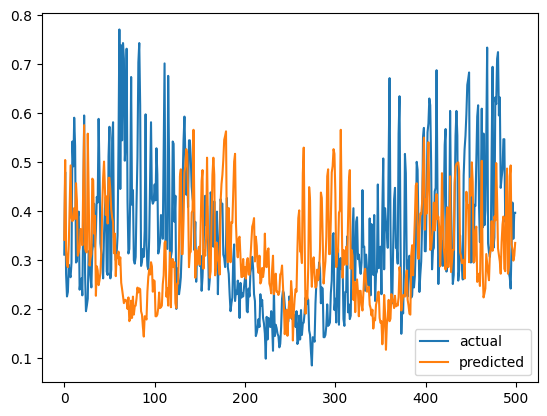

In [10]:
# ============================================================================================
# PROBLEM B5
#
# Build and train a neural network model using the Daily Max Temperature.csv dataset.
# Use MAE as the metrics of your neural network model.
# We provided code for normalizing the data. Please do not change the code.
# Do not use lambda layers in your model.
#
# The dataset used in this problem is downloaded from https://github.com/jbrownlee/Datasets
#
# Desired MAE < 0.2 on the normalized dataset.
# ============================================================================================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import urllib

from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)


def solution_B5():
    data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-max-temperatures.csv'
    urllib.request.urlretrieve(data_url, 'daily-max-temperatures.csv')

    time_step = []
    temps = []

    with open('daily-max-temperatures.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        step = 0
        for row in reader:
            temps.append(row[1])
            time_step.append(row[0])
            step=step + 1

    series=np.array(temps, dtype=float)

    # Normalization Function. DO NOT CHANGE THIS CODE
    min=np.min(series)
    max=np.max(series)
    series -= min
    series /= max
    time=np.array(time_step)

    # DO NOT CHANGE THIS CODE
    split_time=2500

    time_train = time[:split_time]
    x_train = series[:split_time]
    time_valid = time[split_time:]
    x_valid = series[split_time:]

    # DO NOT CHANGE THIS CODE
    window_size=64
    batch_size=256
    shuffle_buffer_size=1000

    train_set=windowed_dataset(
        x_train, window_size, batch_size, shuffle_buffer_size)
    print(train_set)
    print(x_train.shape)

    val_set = windowed_dataset(
        x_valid, window_size, batch_size, shuffle_buffer_size)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])

    # YOUR CODE HERE
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])

    model.fit(train_set, epochs=500, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], validation_data=val_set)

    # Plot the predictions against the actual values
    test_set = windowed_dataset(
        x_valid, window_size, batch_size, shuffle_buffer_size)
    test_pred = model.predict(test_set).flatten()

    # Take the first 500 samples from the test set
    test_pred = test_pred[:500]
    test_truth = x_valid[:500]

    # Plot the actual values against the predictions
    plt.plot(test_truth, label='actual')
    plt.plot(test_pred, label='predicted')
    plt.legend()
    plt.show()

    return model

# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_B5()
    model.save("model_B5.h5")